In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### 4.2 문제

In [2]:
network = pd.read_excel('/content/wiki.xlsx', header = None)

In [3]:
network

,0,1,2
0,Network science,Cascading failure,Blackouts
1,Network science,Cascading failure,Brittle system
2,Network science,Cascading failure,Butterfly effect
3,Network science,Cascading failure,Byzantine failure
4,Network science,Cascading failure,Cascading rollback
...,...,...,...
270,Network science,Random networks,Flow graph
271,Network science,Random networks,Max-flow min-cut theorem
272,Network science,Random networks,Oriented matroid
273,Network science,Random networks,Shortest path problem


In [4]:
network.isnull().sum()

0    0
1    0
2    8
dtype: int64

In [5]:
network_scale= network.replace(np.nan, 'None')

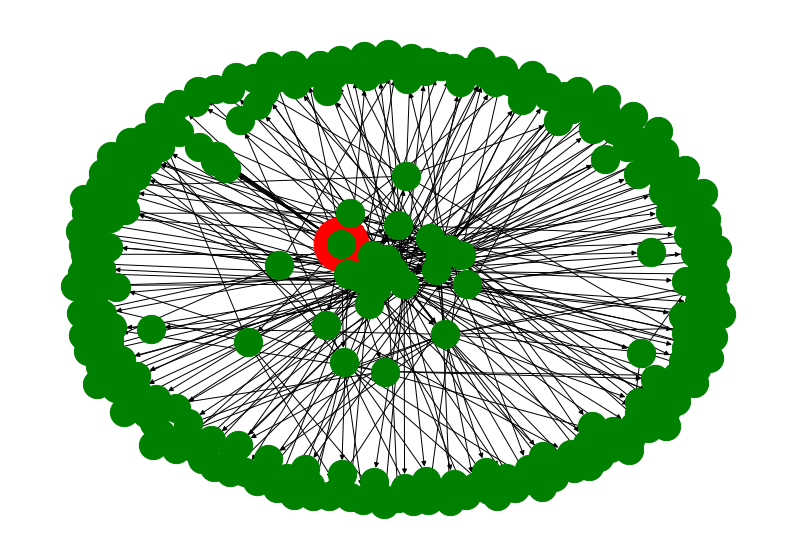

In [6]:
# 그림 크기 설정
plt.rcParams["figure.figsize"] = [14,10]

# Network Science의 그래프
g = nx.from_pandas_edgelist(network_scale ,0,1, create_using=nx.DiGraph())

# Network Science 이웃의 그래프
h = nx.from_pandas_edgelist(network_scale,1,2, create_using=nx.DiGraph())

# 결합
u = nx.compose(g,h) 

ego = 'Network science'
pos = nx.spring_layout(u)

options = {"node_size":3000, "node_color":"r"}
nx.draw_networkx_nodes(u, pos, nodelist=[ego],**options) # ego 노드 크기와 색상 별도 설정

nx.draw(u, pos, node_color = 'green', node_size = 800) 
plt.show()

In [7]:
in_nd = u.in_degree

In [8]:
in_nd = dict(in_nd)

In [9]:
print(sum(in_nd.values()))

309


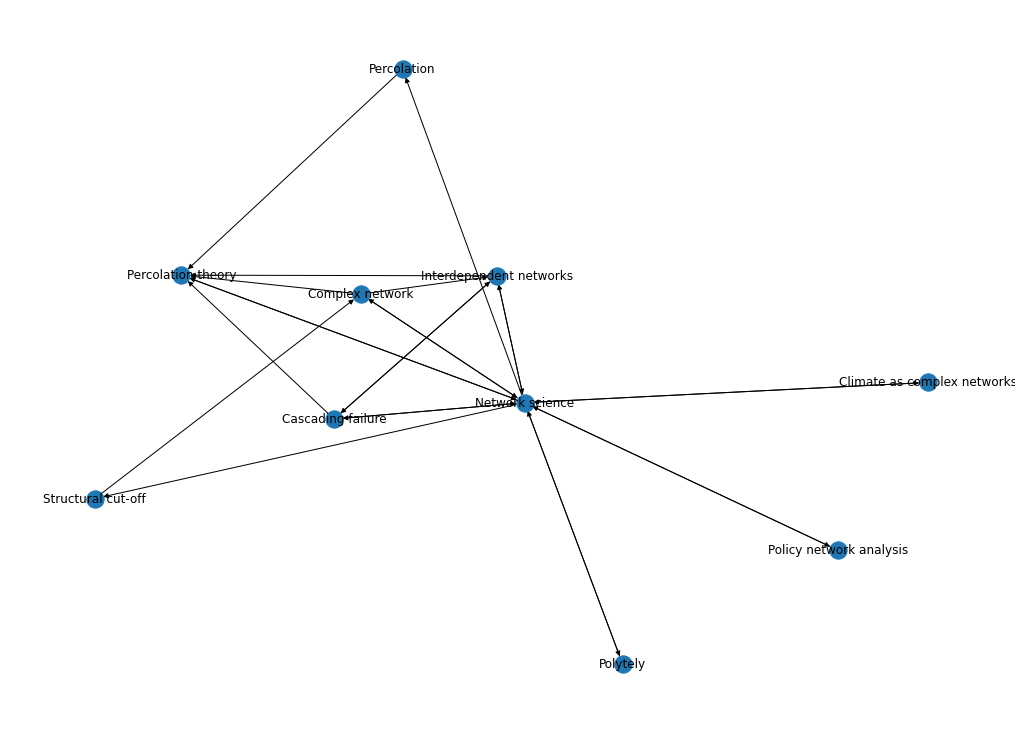

In [10]:
comps = sorted(nx.strongly_connected_components(u),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(u, nodes_in_giant_comp)
nx.draw(gc, with_labels = True)
# 책2.3, 77page

In [11]:
out_gc = dict(gc.out_degree)
del out_gc['Network science']
[k for k, v in out_gc.items() if max(out_gc.values())==v]
#리스트 컴프리 핸션

['Complex network', 'Cascading failure', 'Interdependent networks']

In [12]:
out_gc

{'Polytely': 1,
 'Structural cut-off': 1,
 'Complex network': 3,
 'Climate as complex networks': 1,
 'Policy network analysis': 1,
 'Cascading failure': 3,
 'Percolation theory': 1,
 'Percolation': 1,
 'Interdependent networks': 3}

In [13]:
in_gc = dict(gc.in_degree)
del in_gc['Network science']
[k for k, v in in_gc.items() if max(in_gc.values())==v]

['Percolation theory']

In [14]:
in_gc

{'Polytely': 1,
 'Structural cut-off': 1,
 'Complex network': 2,
 'Climate as complex networks': 1,
 'Policy network analysis': 1,
 'Cascading failure': 2,
 'Percolation theory': 5,
 'Percolation': 1,
 'Interdependent networks': 3}

#### 문제 4.4

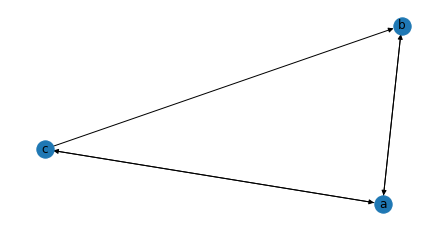

In [15]:
s = nx.DiGraph()
s.add_edges_from([
    ('a','b'),('a','c'),
    ('b','a'),
    ('c','a'),('c','b')
])

plt.rcParams["figure.figsize"] = [6,3]
nx.draw(s, with_labels = True)

In [85]:
pg = {'a': 0.333, 'b': 0.333, 'c': 0.333}
pg 

{'a': 0.333, 'b': 0.333, 'c': 0.333}

In [83]:
# a = 2 b = 1 c =2
def pgrank(pg1,pg2,pg3,tf,n) : # pg1 : 페이지 링크, tf : 순간이동 , n : 페이지 수 개수
  pr_a = pg2+pg3/2
  pr_b = pg1/2+pg3/2
  pr_c = pg1/2
  pg['a'] = tf/n +(1-tf)*pr_a
  pg['b'] = tf/n +(1-tf)*pr_b
  pg['c'] = tf/n +(1-tf)*pr_c


In [84]:
print(pg)
for idx in range(1,100):
  pgrank(pg['a'],pg['b'],pg['c'],0,3)
  print("idx : ",idx,pg)

{'a': 0.333, 'b': 0.333, 'c': 0.333}
idx :  1 {'a': 0.49950000000000006, 'b': 0.333, 'c': 0.1665}
idx :  2 {'a': 0.41625, 'b': 0.333, 'c': 0.24975000000000003}
idx :  3 {'a': 0.45787500000000003, 'b': 0.333, 'c': 0.208125}
idx :  4 {'a': 0.4370625, 'b': 0.333, 'c': 0.22893750000000002}
idx :  5 {'a': 0.44746875, 'b': 0.333, 'c': 0.21853125}
idx :  6 {'a': 0.442265625, 'b': 0.333, 'c': 0.223734375}
idx :  7 {'a': 0.44486718750000004, 'b': 0.333, 'c': 0.2211328125}
idx :  8 {'a': 0.44356640625, 'b': 0.333, 'c': 0.22243359375000002}
idx :  9 {'a': 0.44421679687500004, 'b': 0.333, 'c': 0.221783203125}
idx :  10 {'a': 0.4438916015625, 'b': 0.333, 'c': 0.22210839843750002}
idx :  11 {'a': 0.44405419921875, 'b': 0.333, 'c': 0.22194580078125}
idx :  12 {'a': 0.44397290039062504, 'b': 0.333, 'c': 0.222027099609375}
idx :  13 {'a': 0.44401354980468755, 'b': 0.333, 'c': 0.22198645019531252}
idx :  14 {'a': 0.44399322509765626, 'b': 0.333, 'c': 0.22200677490234377}
idx :  15 {'a': 0.44400338745117

In [86]:
# a = 2 b = 1 c =2
def pgrank(pg1,pg2,pg3,tf,n) : # pg1 : 페이지 링크, tf : 순간이동 , n : 페이지 수 개수
  pr_a = pg2+pg3/2
  pr_b = pg1/2+pg3/2
  pr_c = pg1/2
  pg['a'] = tf/n +(1-tf)*pr_a
  pg['b'] = tf/n +(1-tf)*pr_b
  pg['c'] = tf/n +(1-tf)*pr_c


In [87]:
print(pg)
for idx in range(1,100):
  pgrank(pg['a'],pg['b'],pg['c'],0.2,3)
  print("idx : ",idx,pg)

{'a': 0.333, 'b': 0.333, 'c': 0.333}
idx :  1 {'a': 0.4662666666666667, 'b': 0.3330666666666667, 'c': 0.1998666666666667}
idx :  2 {'a': 0.4130666666666667, 'b': 0.33312, 'c': 0.25317333333333336}
idx :  3 {'a': 0.43443200000000004, 'b': 0.33316266666666666, 'c': 0.23189333333333334}
idx :  4 {'a': 0.4259541333333334, 'b': 0.3331968, 'c': 0.2404394666666667}
idx :  5 {'a': 0.4293998933333334, 'b': 0.33322410666666674, 'c': 0.23704832000000003}
idx :  6 {'a': 0.4280652800000001, 'b': 0.333245952, 'c': 0.23842662400000003}
idx :  7 {'a': 0.4286340778666667, 'b': 0.3332634282666667, 'c': 0.2378927786666667}
idx :  8 {'a': 0.4284345207466667, 'b': 0.33327740928, 'c': 0.23812029781333333}
idx :  9 {'a': 0.428536713216, 'b': 0.3332885940906667, 'c': 0.23804047496533337}
idx :  10 {'a': 0.4285137319253334, 'b': 0.3332975419392, 'c': 0.23808135195306668}
idx :  11 {'a': 0.4285372409992534, 'b': 0.33330470021802666, 'c': 0.23807215943680005}
idx :  12 {'a': 0.42853929061580803, 'b': 0.333310426

#### 4.7문제

In [88]:
math = nx.read_graphml('/content/enwiki_math.graphml.gz')

In [103]:
rank = nx.pagerank(math)
res1 = [key for (key, value) in sorted(rank.items(), key = lambda x:x[1], reverse= True)] # pagerank가 높은 key를 순서대로 출력
a = res1[:10]
print(a)

['18831', '1152126', '18902', '198822', '1485646', '26685', '20120951', '1234374', '24295969', '48396']


In [104]:
math_in_degree = dict(math.in_degree())
res2 = [key for (key, value) in sorted(math_in_degree.items(), key = lambda x:x[1], reverse= True)]
b = res2[:10]
print(b)

['1152126', '18831', '18902', '1485646', '198822', '1234374', '20120951', '48396', '627842', '24295969']


In [105]:
print(set(a)&set(b))

{'48396', '20120951', '18831', '1485646', '18902', '1234374', '24295969', '1152126', '198822'}


# 트위터 api

In [107]:
pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from twython import Twython

In [109]:
api_key = 'X4dLEBcMR4DjDD67821xlZFAR'
api_secret_key = 'tD4KQv6J88r97rcu7dUKu1hMFKqlDAMHranSsD3tmoKIwcnsep'

twitter = Twython(api_key, api_secret_key)
authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=3DG6XwAAAAABiIQwAAABg9FyLok


In [110]:
verifier = '9141650' # 위의 링크로 접속하면 확인 가능
twitter = Twython(api_key, api_secret_key,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(verifier)

In [112]:
twitter = Twython(api_key, api_secret_key,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'id': 1580542983731965953,
 'id_str': '1580542983731965953',
 'name': '함승훈',
 'screen_name': 'Hamjang_1204',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 0,
 'friends_count': 0,
 'listed_count': 0,
 'created_at': 'Thu Oct 13 12:56:34 +0000 2022',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 0,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_link_color': '1DA1F2',
 'profile_sidebar_bor

#### 사용자 객체

In [113]:
user = twitter.show_user(screen_name='OSoMe_IU')
user

{'id': 187521608,
 'id_str': '187521608',
 'name': 'OSoMe',
 'screen_name': 'OSoMe_IU',
 'location': 'Bloomington, IN',
 'profile_location': None,
 'description': 'The Observatory on Social Media (awe•some) is a research center at Indiana University to study the spread of misinformation. Tweets by Fil Menczer & OSoMe Team',
 'url': 'https://t.co/mvagxYPopo',
 'entities': {'url': {'urls': [{'url': 'https://t.co/mvagxYPopo',
     'expanded_url': 'http://osome.iu.edu/',
     'display_url': 'osome.iu.edu',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 5373,
 'friends_count': 482,
 'listed_count': 321,
 'created_at': 'Mon Sep 06 13:31:27 +0000 2010',
 'favourites_count': 1808,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 4269,
 'lang': None,
 'status': {'created_at': 'Wed Oct 12 19:05:01 +0000 2022',
  'id': 1580273349934317569,
  'id_str': '1580273349934317569',
  'text': 'RT @jb

In [114]:
print(user['friends_count'], user['followers_count'])

482 5373


In [115]:
print("""
Twitter user @{screen_name}
has {followers_count} followers,
follows {friends_count} users,
and has tweeted {statuses_count} times.
""".format(**user))


Twitter user @OSoMe_IU
has 5373 followers,
follows 482 users,
and has tweeted 4269 times.



#### Tweet 객체

In [116]:
most_recent_tweet = user['status']
most_recent_tweet

{'created_at': 'Wed Oct 12 19:05:01 +0000 2022',
 'id': 1580273349934317569,
 'id_str': '1580273349934317569',
 'text': 'RT @jb_tweets: 🚨 New paper alert🚨\nCould Facebook be setting parliamentary agendas? We found that discourse in the UK parliament follows pub…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'jb_tweets',
    'name': 'John Bryden',
    'id': 76685548,
    'id_str': '76685548',
    'indices': [3, 13]}],
  'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'geo': None,
 'coordinates': None,
 'place': None,
 'contributors': None,
 'retweeted_status': {'created_at': 'Wed Oct 12 12:54:35 +0000 2022',
  'id': 1580180128683810817,
  'id_str': '1580180128683810817',
  'text': '🚨 New paper alert🚨\nC

In [117]:
most_recent_tweet['text']
# 트위터 객체에서는 가장 기본적인 것이 'text'랑 'entities'이다

'RT @jb_tweets: 🚨 New paper alert🚨\nCould Facebook be setting parliamentary agendas? We found that discourse in the UK parliament follows pub…'

In [ ]:
most_recent_tweet['entities']

In [118]:
most_recent_tweet['entities']['user_mentions']

[{'screen_name': 'jb_tweets',
  'name': 'John Bryden',
  'id': 76685548,
  'id_str': '76685548',
  'indices': [3, 13]}]

#### 관심 있는 트윗을 얻기
- 트위터의 검색 API를 사용하면 키워드, URL, 해시태그, 사용자 언급 등의 쿼리에 따라 최근 트윗을 가져올 수 있습니다.

##### 해쉬태그와 매칭하는 트윗찾기

In [119]:
search_response = twitter.search(q='#science', count=100)

In [120]:
search_tweets = search_response['statuses']
tweet = search_tweets[0]
tweet

{'created_at': 'Thu Oct 13 13:46:43 +0000 2022',
 'id': 1580555635376414720,
 'id_str': '1580555635376414720',
 'text': 'Knowing the culture which is connected to language we are learning is important once cultural traits may sometimes… https://t.co/iwiJk7iJLe',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/iwiJk7iJLe',
    'expanded_url': 'https://twitter.com/i/web/status/1580555635376414720',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 95852581,
  'id_str': '95852581',
  'name': 'Teacher Orlando',
  'screen_name': 'Teacher_Orlando'

In [122]:
tweet['user']
# 트윗을 만든 사용자를 위한 사용자 개체입니다.

{'id': 95852581,
 'id_str': '95852581',
 'name': 'Teacher Orlando',
 'screen_name': 'Teacher_Orlando',
 'location': 'Campinas/SP/Brazil',
 'description': 'English Teacher and Online Tutor Specialized in Information Technology, Lecturer, Content Producer',
 'url': 'https://t.co/PW7f8wKsTK',
 'entities': {'url': {'urls': [{'url': 'https://t.co/PW7f8wKsTK',
     'expanded_url': 'http://www.english121.com.br',
     'display_url': 'english121.com.br',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 1260,
 'friends_count': 2126,
 'listed_count': 56,
 'created_at': 'Thu Dec 10 07:54:58 +0000 2009',
 'favourites_count': 2716,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 12137,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'B2DFDA',
 'profile_background_image_url': 'http://abs.twimg.com/images/theme

#### 커서를 사용해서 100개 이상의 트윗 받기
- 단일 검색 API 호출에서 한 번에 최대 100개의 트윗만 가져올 수 있습니다.



In [123]:
search_response = twitter.search(q='#science', count=1000)
len(search_response['statuses'])

100

In [124]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

# 검색에서 더 많은 트윗을 가져오기 위해서 커서를 사용할 수 있다.

1000

In [125]:
type(cursor)

generator

#### API 메서드 속도 제한
- 각 API 방식에는 트위터가 부과하는 15분 창당 함수 호출 횟수 제한인 요금 제한이 있습니다. 이 엔드포인트에 대한 속도 제한 상태를 확인할 수 있습니다.

In [126]:

twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 169, 'reset': 1665672631}}

#### 소셜 네트워크 그래프 만들기

[('CambridgeUP', 'OSoMe_IU', {'weight': 1})]

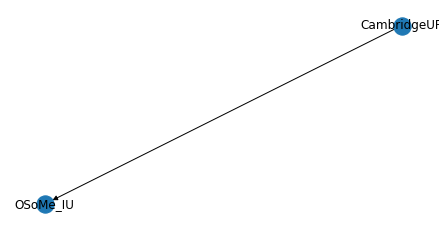

In [137]:
d = nx.DiGraph()

publisher = twitter.show_user(screen_name='CambridgeUP')
author = twitter.show_user(screen_name='osome_iu')

d.add_edge(publisher['screen_name'], author['screen_name'], weight=1)
nx.draw(d, with_labels = True)
list(d.edges(data = True))

[('CambridgeUP', 'OSoMe_IU', {'weight': 1})]

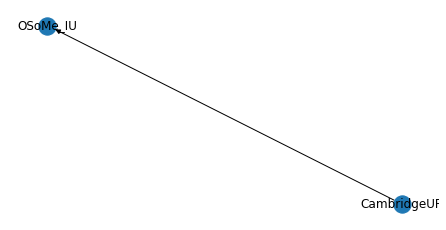

In [133]:
nx.draw(d, with_labels = True)
list(d.edges(data = True))

#### 트위터 리트윗 네트워크

In [135]:
# 일부 트윗 가져오기
NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

1000

In [136]:
# 리트윗 필터
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

493

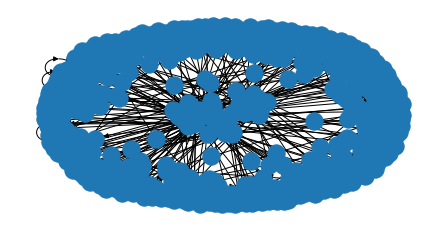

In [140]:
# 그래프 그리기
D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

nx.draw(D)

#### 그래프 분석

In [141]:
max(D.nodes, key=D.out_degree)
# 나가는 링크가 많은 노드

'chrost_hugo'

In [142]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('chrost_hugo', 28),
 ('imedverse', 28),
 ('isciverse', 16),
 ('sorae_jp', 16),
 ('micROCKScopica', 9)]

In [143]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]
# 가중치 포함

[('chrost_hugo', 32),
 ('imedverse', 28),
 ('isciverse', 20),
 ('sorae_jp', 16),
 ('micROCKScopica', 9)]

In [144]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]
# 이상 감지

[('hephaistos_ai', 6),
 ('jayaisales', 5),
 ('nod3bot', 4),
 ('ScicommBot', 3),
 ('Fabriciosx', 3)]

#### 연결성

In [145]:
nx.is_weakly_connected(D)

False

In [146]:
nx.number_weakly_connected_components(D)

215

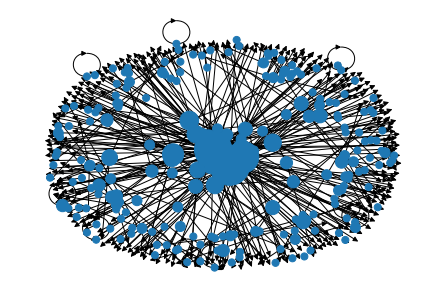

In [147]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
# 연결강도에 따른 노드 크기

#### 트위터 언급 네트워크

In [148]:
#트위터 가져오기
NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

1000

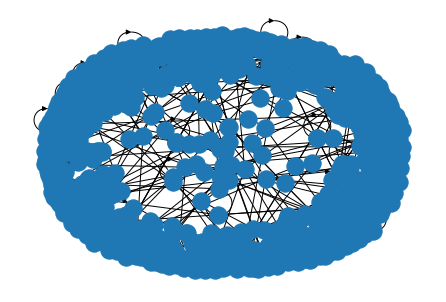

In [149]:
D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

nx.draw(D)

- 가장 유명한 사용자

In [150]:
max(D.nodes, key=D.in_degree)

'imedverse'

In [151]:
sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('imedverse', 36),
 ('chrost_hugo', 29),
 ('Nature', 20),
 ('NeuroscienceNew', 12),
 ('isciverse', 11)]

In [152]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('imedverse', 36),
 ('chrost_hugo', 31),
 ('Nature', 20),
 ('NeuroscienceNew', 13),
 ('isciverse', 12)]

In [153]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('jayaisales', 8),
 ('InfyFoundation', 7),
 ('IFOS9000', 6),
 ('hephaistos_ai', 5),
 ('CyclingDoctor', 5)]

In [154]:
nx.is_weakly_connected(D)

False

In [155]:
nx.number_weakly_connected_components(D)

273

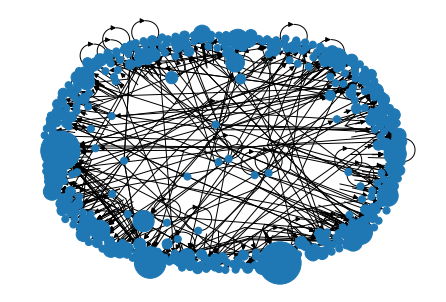

In [156]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)